# Explainable AI (XAI) -- Understand SHAP (SHapley Additive exPlanations)

SHAP is a widely-used method in Explainable AI (XAI) that provides insights into how machine learning models make predictions. It leverages cooperative game theory (Shapley values) to assign feature importance scores.

* SHAP uses Shapley values from cooperative game theory to fairly distribute the "contribution" of each feature to the prediction of a machine learning model.

* It explains predictions by assigning each feature a numerical importance based on how much it contributes to the final prediction.



Below is the Step-by-step SHAP Tutorial in Python

### Step 1: Install Libraries

In [ ]:
# Step 1: Install Libraries

!pip install shap xgboost scikit-learn matplotlib

### Step 2: Load the modules and prepare the dataset

Here in the example we will be using Iris dataset (Which contains measurements for three different species of iris flowers.)

This is just an example for the SHAP method, and the dataset will include 4 features of the flowers.

* Sepal length (cm)
* Sepal width (cm)
* Petal length (cm)
* Petal width (cm)

In [9]:
# Step 2: Load the modules

import shap
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Step 3: Prepare the dataset

* X = measurements of each iris flower
* Y = labels indicating the species 

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 4: Train Model

XGBClassifier - A classification algorithm from the XGBoost library that uses gradient boosting trees to produce accurate predictions.

In [11]:
model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Step 5: Compute SHAP values and Visualize

This can explain our model's predictions.

In [12]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

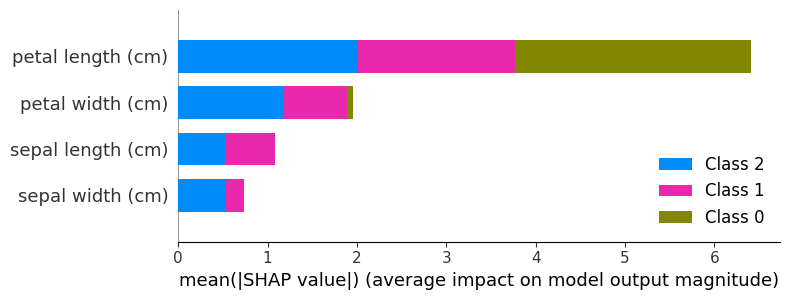

In [13]:
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names)

As we see on the plot. The features are sorted by its importanceness from top to bottom

* Petal Length (cm) has the highest importance, significantly influencing predictions across all three classes. It also shows that the Petal Length primarily influce Class 0 (green bar), but also substantially impact Class 2 and 1. 

Each dot represents the impact of a feature value on a prediction.

Color indicates feature value like blue: low and red: high

### Step 6: Interpret Results

SHAP values can help us understand which features impact predictions the most. And how individual predictions were made. Lastly, also tell use the relationships between feature values and outcomes.

### Exploration and Future Improvement

There are many preload benchmark Machine Learning dataset in the sklearn module. For example, the Wine Dataset, Breast Cancer Wisconsin, MNIST, etc...

The dataset below was generated by ChatGPT 4o on March 18 at 14:23pm as recommendation

* Iris (flower species classification, 150 samples, 3 classes)
* Wine (wine cultivar classification, 178 samples, 3 classes)
* Breast Cancer Wisconsin (tumor classification, 569 samples, 2 classes)
* MNIST (handwritten digit classification, 70,000 images, 10 classes)
* CIFAR-10 / CIFAR-100 (object recognition, 60,000 images, 10 or 100 classes)
* Fashion-MNIST (clothing item classification, 70,000 images, 10 classes)
* Titanic (survival prediction, 891 samples, 2 classes)
* Adult (Census) (income classification, ~48K samples, binary classes)